### 1) What are the main motivations for reducing a dataset's dimensionality? What are the main drawbacks?

The main motivation is to decrease the size of your training set. This could lead to faster training (and predicting), and could also potentially make your model more memory-efficient. It also makes possible to visualize the data, since you can't visualize high-dimensional data. The main drawback is that you lose some information. In the best case scenario, you only lose noise.

### 2) What is the curse of dimensionality?

The curse of dimensionality refers to the problems that appear with a wide dataset (too many inputs). These problems often relate to the non-linearity of the training time in most machine learning models. This usually happens because, in high-dimensions, most instances are too far apart from one-another making it difficult to find patterns.

### 3) Once a dataset's dimensionality has been reduced, is it possible to reverse the operation? If so, how? If not, why?

Depending on the algorithm, yes it is, at least partially. For example, in PCA you just need to take the processes backwards and use the *inverse_transform*, method but the information lost cannot be recovered.  

### 4) Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?

Yes, it can, but not necessarily this would be the best approach, since some highly nonlinear datasets could be not well suited to be projected on a smaller dimension minimizing the points distance to the new hiperplane, like PCA does. In some case you would be better by taking a manifold learning approach.

### 5) Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have? 

It depends on how the datapoints are dispersed within the 1,000 dimensional hyperplane. If the points are very near to each other along a single line, then even 1 dimension would be enough to explain 95% of the variance. On the other hand, if the points are almost randomly positioned, then you would need something near 950 dimensions.

### 6) In what cases would you use regular PCA, incremental PCA, randomized PCA, or random projection?

Regular PCA is well suited for when you don't have a too large dataset, something you can open in-memory and would not take too long to run. Incremental PCA is for the cases where the dataset is so large that you cannot open it on memory. Randomized PCA is similar to PCA (i.e., you need to open in-memory), but could be much faster to run depending on the data size. Random Projection on the other hand, projects the data on a random d-dimensional hyperplane, so it is way faster to run than a regular PCA.

### 7) How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?

You could  analyse how much of the original variance of the original dataset remains on the new dataset, that is, you can analyse how much information you lost in order to decrease dimensional size. Other than that, depends on case to case. For example, if you are using dimensionality reduction to compress a file, than you could try to reverse the operation and analyse how good is the compressed file (as in the MNIST example). If you want to predict something, you could try to run the predictor with the original and the diminished sets and see how the performance compares.

### 8) Does it make any sense to chain two different dimensionality reduction algorithms?

It could make. You could start by using a manifold algorithm to "disentangle" a dataset like swiss roll, and then decrease the output dimension with PCA.

** The official answer actually states the opposite as example, using PCA to decrease the number of dimensions in order to train a manifold faster **

### 9) Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a random forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set, Next, use PCA to reducte the dataset's dimensionality, with an explained variance ratio of 95%. Train a new random forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next, evaluate the classifier on the test set. How does it compare to the previous classifier? Try again with an SGDClassifier. How much does PCA help now?

In [33]:
#Load MNIST
#open MNIST dataset and split into training, validation and testing
import sklearn as skl
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target
X_train,  X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],y[60000:]

In [52]:
#Train RF (without parralel training)
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state = 42, n_estimators = 100)
%time rf_clf.fit(X_train, y_train)

CPU times: total: 28.9 s
Wall time: 29.1 s


RandomForestClassifier(random_state=42)

In [53]:
#Test it 
rf_clf.score(X_test, y_test)

0.9705

In [54]:
#Using PCA
from sklearn.decomposition import PCA
pca = PCA(random_state = 42, n_components = 0.95)
X_train_dim = pca.fit_transform(X_train)

#See % change in dimensions
round(X_train_dim.shape[1]/X_train.shape[1] -1,3)

-0.804

In [ ]:
#Train RF on new dataset
rf_dim_clf = RandomForestClassifier(random_state = 42, n_estimators = 100)
%time rf_dim_clf.fit(X_train_dim, y_train)

CPU times: total: 1min 18s
Wall time: 1min 19s


RandomForestClassifier(random_state=42)

In [57]:
#Performance on test set
X_test_dim = pca.transform(X_test)
rf_dim_clf.score(X_test_dim, y_test)

0.9488

It actually took way longer to train, since not always dimensionality reduction decreased training time. It also generated a considerably lower accuracy on the test set. Lets see now on SGDClassifier

In [58]:
#train SGD classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
%time sgd_clf.fit(X_train, y_train)

CPU times: total: 1min 33s
Wall time: 1min 34s


SGDClassifier(random_state=42)

In [59]:
#Train SGD Classifier on the reduced dataset
sgd_dim_clf = SGDClassifier(random_state = 42)
%time sgd_dim_clf.fit(X_train_dim, y_train)

CPU times: total: 21.5 s
Wall time: 21.7 s


SGDClassifier(random_state=42)

In [61]:
#Compare performance
print(sgd_clf.score(X_test, y_test))
print(sgd_dim_clf.score(X_test_dim, y_test))

0.874
0.8959


In the SGDClassifier case, we got a much smaller training time (21 secs vs 1min 34 secs), while also gaining additional accuracy.

### 10) Use t-SNE to reduce the first 5,000 images of the MNIST dataset down to 2 dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image's target class. Alternatively, you can replace each  dot in the scatterplot with the corresponding instance's class (a digit from 0-9), or even plot scaled-down versions of the digit images themselves (if you plot all difits the visualiation will be too cluttered, so you shoul wither draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well separeted clusters of digits. Try using dimensionality reduction algorithms, such as PCA, LLE, or MDS, and compare the resulting visuzalizations.

In [64]:
from sklearn.manifold import TSNE 
X_new = X_train[:5000]
y_new = y_train[:5000]
tsne = TSNE(n_components=2, random_state = 42)
X_tsne = tsne.fit_transform(X_new)

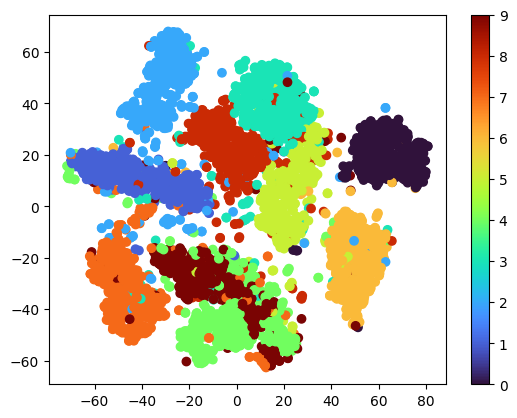

In [77]:
import matplotlib.pyplot as plt 
plt.scatter(X_tsne[:,0], X_tsne[:,1], c = y_new.astype(np.int8),
            cmap = 'turbo')
plt.colorbar()
plt.show()

In [78]:
#Lets train other dimensionality reduction algorithms
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
pca = PCA(n_components = 2, random_state = 42)
lle = LocallyLinearEmbedding(n_components = 2, random_state = 42)
mds = MDS(n_components = 2, random_state = 42)

X_pca = pca.fit_transform(X_new)
X_lle = lle.fit_transform(X_new)
X_mds = mds.fit_transform(X_new)

In [81]:
def plot_dim(axis1, axis2, title):
    plt.scatter(axis1, axis2, c = y_new.astype(np.int8),
                cmap = "turbo")
    plt.colorbar()
    plt.axis("off")
    plt.title(title)


(5000, 2)
(5000, 2)
(5000, 2)
(5000, 2)


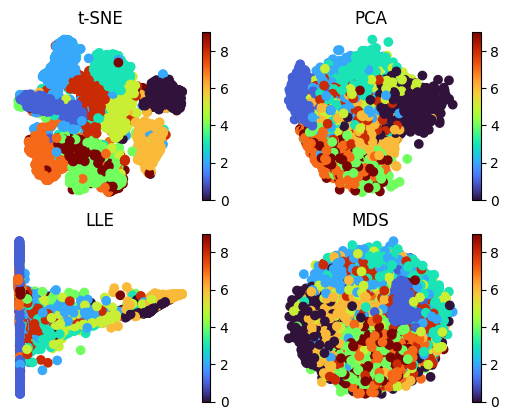

In [82]:
# Plot everything
def plot_dim(axis1, axis2, title):
    plt.scatter(axis1, axis2, c = y_new.astype(np.int8),
                cmap = "turbo")
    plt.colorbar()
    plt.axis("off")
    plt.title(title)

fig, axs = plt.subplots(nrows = 2, ncols = 2)
plt.subplot(2,2,1); plot_dim(X_tsne[:,0], X_tsne[:,1], "t-SNE")
plt.subplot(2,2,2); plot_dim(X_pca[:,0], X_pca[:,1], "PCA")
plt.subplot(2,2,3); plot_dim(X_lle[:,0], X_lle[:,1], "LLE")
plt.subplot(2,2,4); plot_dim(X_mds[:,0], X_mds[:,1], "MDS")

plt.show()

So t-SNE separetes pretty well the classes into clusters, with some overlap. PCA does an OK job, while LLE and MDS dont.